In [ ]:
"""
Preliminary EDA of bad and good frames
on blur detection

1. Percentage of clear
    - Bad frames: 42%
    - Good frames: 83%
    
2. Laplacian ratio of cat face to whole picture
    - Bad mean: 0.115
    - Good mean: 0.186


"""

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
bad = pd.read_csv('./OpenCV_blur/blurriness_bad.csv')
bad['label'] = ['bad']*bad.shape[0]
good = pd.read_csv('./OpenCV_blur/blurriness_good.csv')
good['label'] = ['good']*good.shape[0]

In [3]:
all_df = pd.concat([bad,good],axis=0)
all_df

,filename,lp_ratio,blur,label
0,bad_0000.jpg,0.000000,1,bad
1,bad_0001.jpg,0.030719,0,bad
2,bad_0002.jpg,0.660800,0,bad
3,bad_0003.jpg,0.051874,0,bad
4,bad_0004.jpg,0.068186,0,bad
...,...,...,...,...
425,good_0425.jpg,0.052267,0,good
426,good_0426.jpg,0.032669,0,good
427,good_0427.jpg,0.042572,0,good
428,good_0428.jpg,0.023665,1,good


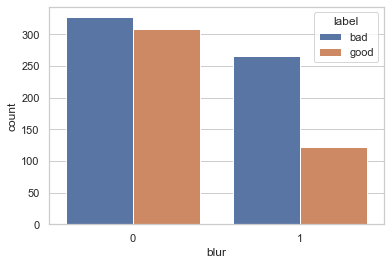

In [4]:
# 0:clear, 1:blurry
sns.set_theme(style="whitegrid")
g = sns.countplot(
    data=all_df,
    x="blur", hue="label"
)

In [5]:
stats = pd.DataFrame([bad.blur.value_counts(sort=False).tolist(),\
              good.blur.value_counts(sort=False).tolist()],\
            index=['bad','good'])
stats.columns = ['0:clear','1:blurry']
stats['clear_perc'] = stats['0:clear']/(stats['0:clear']+stats['1:blurry'])
stats

,0:clear,1:blurry,clear_perc
bad,327,265,0.552365
good,308,122,0.716279


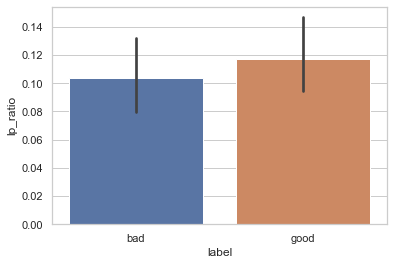

In [6]:
ax = sns.barplot(x="label", y="lp_ratio", data=all_df)

In [7]:
bad.describe()

,lp_ratio,blur
count,592.000000,592.000000
mean,0.103846,0.447635
std,0.328077,0.497671
min,0.000000,0.000000
25%,0.021658,0.000000
50%,0.032131,0.000000
75%,0.045487,1.000000
max,3.816311,1.000000


In [8]:
good.describe()

,lp_ratio,blur
count,430.000000,430.000000
mean,0.117167,0.283721
std,0.270058,0.451328
min,0.004429,0.000000
25%,0.027859,0.000000
50%,0.038014,0.000000
75%,0.070014,1.000000
max,3.007840,1.000000


In [9]:
# Pickle
all_df.to_pickle('./dump/blur_df')